# Coursework: Robot movement classifier
## Course: Artificial Intelligence (MT8008)
### Author: Andrés Jiménez Mora 

### Description

This notebook shows a *sample* of coursework (homework #1) carried out for the elective class "Artificial Intelligence", on the topics of Multilayer Perceptron Neural Networks for classification tasks. 

### Objective 

Classify 4 types of movements of a mobile robot SCITOS G5, through a neural network multilayer perceptron, based on readings of 4 virtual sensors (summarizing the measurements of 24 real sensors).

Dataset: https://archive.ics.uci.edu/dataset/194/wall+following+robot+navigation+data

### Solution 

A simple MLP neural network was implemented, as well as a visualization for the decision boundaries. The parameters and hyperparameters were chosen after several experiments of variation, always looking foward to increase the test accuracy.

Test Accuracy: 0.982
Test loss: 0.074


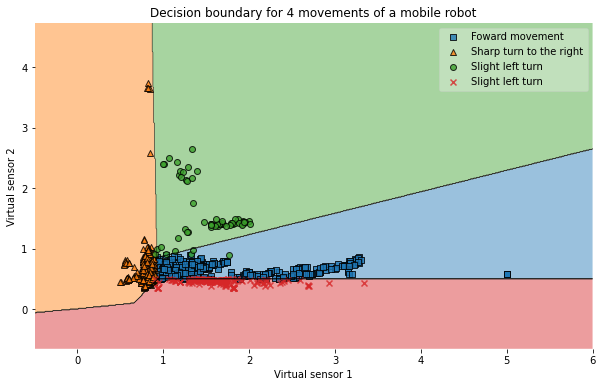

In [3]:
#Importaciones necesarias para gráficar los límites de decisión y generar una red neuronal
import tensorflow as tf
from pandas import read_csv
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.data import iris_data
from mlxtend.preprocessing import standardize
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Se define una clase para convertir valores codificados mediante one-hot a valores enteros
class Onehot2Int(object):

    def __init__(self, model):
        self.model = model

    def predict(self, X):
        y_pred = self.model.predict(X)
        return np.argmax(y_pred, axis=1)

#Link de los datos crudos
path = "https://raw.githubusercontent.com/Vektor1428/Inteligencia_Artificial/main/sensor_readings_2.csv"

#Se crea un array para almacenar los datos
df = read_csv(path, header = None)

# Definición de entradas y salidas
X, y = df.values[:, :-1], df.values[:, -1]
X = X.astype('float32')
y = LabelEncoder().fit_transform(y)

# Dividir datos en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

# Encontrar el numero de datos de entrada
n_features = X_train.shape[1]

# Definir  el modelo de forma secuencial
model = Sequential()

#Se define la primer capa oculta y la capa de entrada, función de activación tanh y como entradas la cantidad de columnas de X_train
model.add(Dense(10, activation = 'relu', kernel_initializer = 'he_normal', input_shape = (n_features,)))

#Se define la capa de salida con la función de densidad de probabilidad
model.add(Dense(4, activation = 'softmax'))

# función de optimización SDG y sus parámetros (con momentum) con gradiente desendiente
tf.keras.optimizers.SGD(learning_rate = 0.1, momentum = 1.0, nesterov = False, name = 'SGD' )

# compilar el modelo
model.compile(optimizer ='SGD', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

# entrenar el modelo
model.fit(X_train, y_train, epochs = 1000, batch_size = 32, verbose = 0, validation_split = 0.2)

# evaluar el modelo
loss, acc = model.evaluate(X_test, y_test, verbose=0)

print('Test Accuracy: %.3f' % acc)
print ('Test loss: %.3f' %loss)

#Convierte las salidas tipo one-hot a números enteros
model_no_ohe = Onehot2Int(model)

#Para determinar los límites de decisión según el modelos del clasificador
ax = plot_decision_regions(X_test, y_test, clf=model_no_ohe)

# Añadir anotaciones a los ejes
plt.xlabel('Virtual sensor 1')
plt.ylabel('Virtual sensor 2')
plt.title('Decision boundary for 4 movements of a mobile robot')
plt.rcParams["figure.figsize"] = (10,6)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, 
          ['Foward movement','Sharp turn to the right','Slight left turn','Slight left turn'], 
           framealpha = 0.3, scatterpoints = 1)
plt.show()

The results above showed clear decision boundaries for the 4 types of movements of robot SCITO G5, in addition to this, the test accuracy proved to be 98.2%. Please note that this notebook represents only a sample of the whole project, consquently, some steps were skipped. The variation experiments are not shown for the sake of simplicity.